## 금융자료
오늘날 웹은 풍부한 금융 정보를 무료로 제공한다.
야후 파이낸스가 주요.

In [27]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd

In [6]:
DAX = web.DataReader('^GDAXI', 'yahoo', start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5144 entries, 2000-01-03 to 2020-04-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       5144 non-null   float64
 1   Low        5144 non-null   float64
 2   Open       5144 non-null   float64
 3   Close      5144 non-null   float64
 4   Volume     5144 non-null   float64
 5   Adj Close  5144 non-null   float64
dtypes: float64(6)
memory usage: 281.3 KB


In [7]:
DAX.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-03,9626.719727,9470.200195,9535.269531,9525.769531,116245300.0,9525.769531
2020-04-06,10097.309570,9841.490234,9889.030273,10075.169922,126692200.0,10075.169922
2020-04-07,10590.410156,10225.019531,10464.110352,10356.700195,149513100.0,10356.700195
2020-04-08,10340.790039,10198.219727,10301.559570,10332.889648,102430700.0,10332.889648
2020-04-09,10649.790039,10311.700195,10490.650391,10564.740234,134477100.0,10564.740234


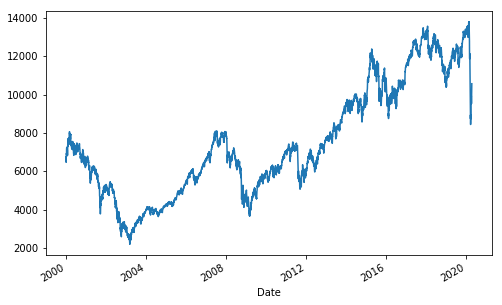

In [9]:
DAX['Close'].plot(figsize=(8,5))

In [13]:
%%time
DAX['Ret_Loop'] = 0.0
for i in range(1, len(DAX)):
    DAX['Ret_Loop'][i] = np.log(DAX['Close'][i] / DAX['Close'][i-1])

Wall time: 827 ms


### Return값 반환하기

In [14]:
DAX[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2020-04-03,9525.769531,-0.004718
2020-04-06,10075.169922,0.056073
2020-04-07,10356.700195,0.027560
2020-04-08,10332.889648,-0.002302
2020-04-09,10564.740234,0.022190


In [20]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

Wall time: 997 µs


In [22]:
DAX[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2020-04-03,9525.769531,-0.004718,-0.004718
2020-04-06,10075.169922,0.056073,0.056073
2020-04-07,10356.700195,0.027560,0.027560
2020-04-08,10332.889648,-0.002302,-0.002302
2020-04-09,10564.740234,0.022190,0.022190


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8EF997CC0>,
      dtype=object)

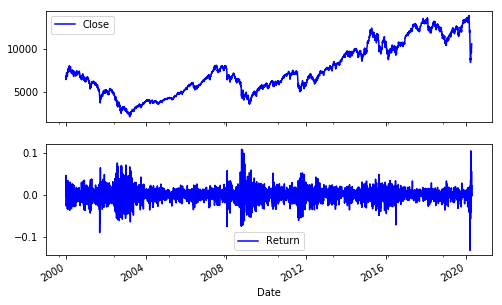

In [25]:
DAX[['Close','Return']].plot(subplots=True, style='b',
                             figsize=(8,5))

### 이동평균선

In [30]:
DAX['42d'] = DAX['Close'].rolling(42).mean()
DAX['252d'] = DAX['Close'].rolling(252).mean()


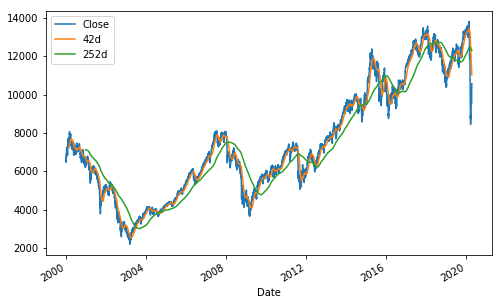

In [32]:
DAX[['Close', '42d', '252d']].plot(figsize=(8,5))

In [33]:
# 변동성
import math
DAX['Mov_vol'] = DAX['Return'].rolling(252).std() * math.sqrt(252)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A8F0D7C630>,
      dtype=object)

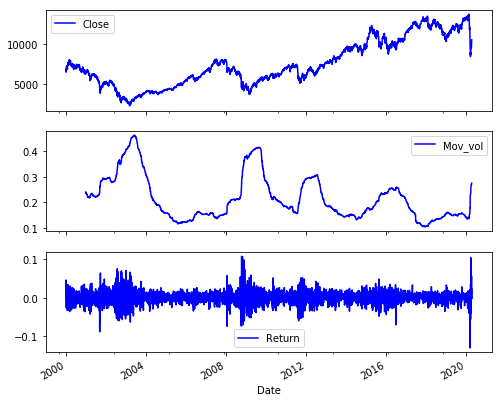

In [34]:
DAX[['Close', 'Mov_vol', 'Return']].plot(subplots=True, style='b', figsize=(8,7))